In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier


In [18]:

X_A, y_A = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=6,
    n_redundant=2,
    n_repeated=2,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=random_seed
)

In [19]:
X_B, y_B = make_moons(n_samples=1000, noise=0.3, random_state=random_seed)


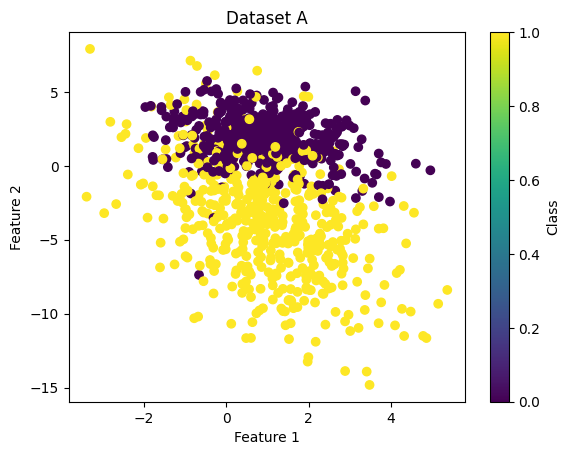

In [20]:
plt.scatter(X_A[:, 0], X_A[:, 1], c=y_A, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset A')
plt.colorbar(label='Class')
plt.show()

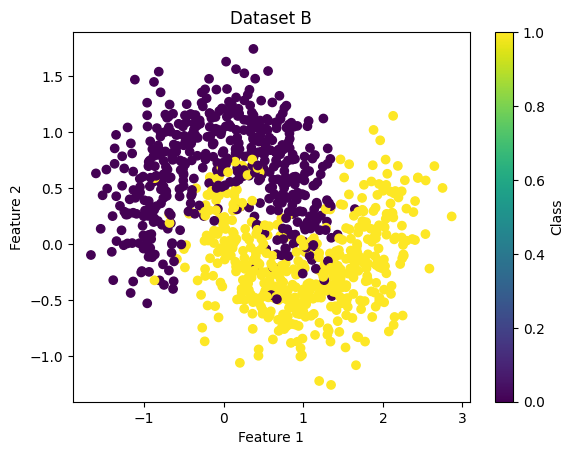

In [21]:
plt.scatter(X_B[:, 0], X_B[:, 1], c=y_B, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset B')
plt.colorbar(label='Class')
plt.show()

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('encoder', OneHotEncoder())
])

# Transform data for Dataset 1
X_processed_1 = preprocessing_pipeline.fit_transform(X)

# Transform data for Dataset 2
X_processed_2 = preprocessing_pipeline.fit_transform(X1)


In [23]:
import pandas as pd
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

random_seed = 42

preprocessing_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('encoder', OneHotEncoder())
])

X_processed_A = preprocessing_pipeline.fit_transform(X_A)
logreg_A_scores = cross_val_score(LogisticRegression(), X_processed_A, y_A, cv=5, scoring='f1')
knn_A_scores = cross_val_score(KNeighborsClassifier(), X_processed_A, y_A, cv=5, scoring='f1')

X_processed_B = preprocessing_pipeline.fit_transform(X_B)
logreg_B_scores = cross_val_score(LogisticRegression(), X_processed_B, y_B, cv=5, scoring='f1')
knn_B_scores = cross_val_score(KNeighborsClassifier(), X_processed_B, y_B, cv=5, scoring='f1')

avg_f1_logreg_A = logreg_A_scores.mean()
avg_f1_knn_A = knn_A_scores.mean()
avg_f1_logreg_B = logreg_B_scores.mean()
avg_f1_knn_B = knn_B_scores.mean()

print("Dataset A:")
print(f"Logistic Regression F1-score: {avg_f1_logreg_A}")
print(f"KNN F1-score: {avg_f1_knn_A}")
print("Dataset B:")
print(f"Logistic Regression F1-score: {avg_f1_logreg_B}")
print(f"KNN F1-score: {avg_f1_knn_B}")

diff_A = abs(avg_f1_logreg_A - avg_f1_knn_A)
diff_B = abs(avg_f1_logreg_B - avg_f1_knn_B)

if diff_A >= 0.02 and diff_B >= 0.02:
    print("Both datasets meet the criteria.")
else:
    print("One or both datasets do not meet the criteria.")

df_A = pd.DataFrame(X_A, columns=[f"Feature_{i}" for i in range(X_A.shape[1])])
df_A['Target'] = y_A


df_B = pd.DataFrame(X_B, columns=[f"Feature_{i}" for i in range(X_B.shape[1])])
df_B['Target'] = y_B

df_A.to_csv('data_A.csv', index=False)
df_B.to_csv('data_B.csv', index=False)


Dataset A:
Logistic Regression F1-score: 0.6693244739756367
KNN F1-score: 0.5351052048726467
Dataset B:
Logistic Regression F1-score: 0.5333333333333333
KNN F1-score: 0.6666666666666666
Both datasets meet the criteria.
